# Play with HuggingFace 🤗 Transformers

In [ ]:
# !pip install transformers

In [ ]:
import transformers
transformers.__version__

'4.57.3'

In [ ]:
from accelerate import Accelerator

device = Accelerator().device

In [ ]:
sentences = ["I'm not very positive with HuggingFace courses.",
             "I like HugginFace Docs"]

## 1- Using Pipelines

In [ ]:
from transformers import pipeline

### Sentiment Analysis

In [ ]:
my_pipeline = pipeline(task="sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
preds = my_pipeline(sentences)

In [ ]:
preds

[{'label': 'NEGATIVE', 'score': 0.9996961355209351},
 {'label': 'POSITIVE', 'score': 0.9976726174354553}]

In [ ]:
my_pipeline_2 = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
preds_2 = my_pipeline_2(sentences)

In [ ]:
preds_2

[{'label': 'negative', 'score': 0.8532103300094604},
 {'label': 'positive', 'score': 0.7718402743339539}]

In [ ]:
translator = pipeline(task="translation", model="google-t5/t5-small")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/__init__.py:1205: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  warnings.warn(
Device set to use cuda:0


In [ ]:
result = translator("This course is produced by Hugging Face.")

In [ ]:
result

[{'translation_text': 'Dieser Kurs wird von Hugging Face produziert.'}]

### Image Segmentation

In [ ]:
pipeline_segmentation = pipeline(task="image-segmentation", device=device)

In [ ]:
segments = pipeline_segmentation("https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png")

`label_ids_to_fuse` unset. No instance will be fused.


In [ ]:
segments

[{'score': 0.999439,
  'label': 'bird',
  'mask': <PIL.Image.Image image mode=L size=768x512>},
 {'score': 0.998787,
  'label': 'bird',
  'mask': <PIL.Image.Image image mode=L size=768x512>}]

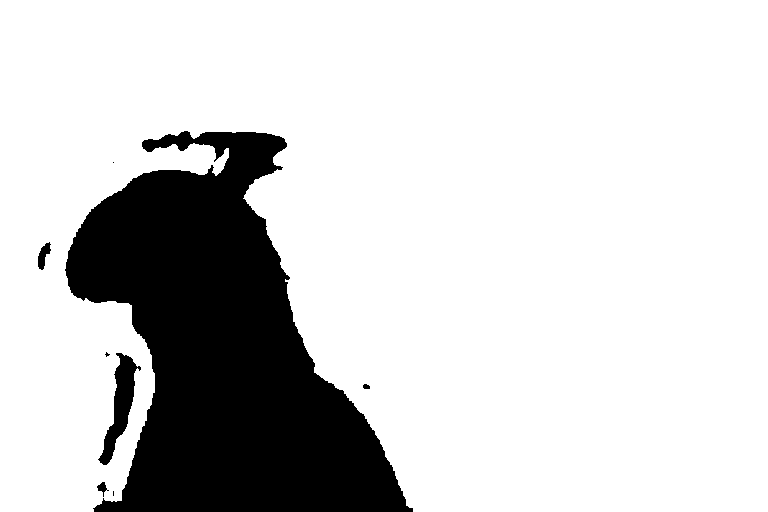

In [ ]:
segments[0]["mask"]

## 2- Using AutoModels

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment-latest")
model_pt = AutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment-latest")
model_tf = TFAutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tf_model.h5:   0%|          | 0.00/499M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
inputs_pt = tokenizer(sentences, padding=True,
                      return_tensors="pt")

In [ ]:
inputs_pt

{'input_ids': tensor([[    0,   100,   437,    45,   182,  1313,    19, 30581,  3923, 34892,
          7484,     4,     2],
        [    0,   100,   101, 30581, 11405, 34892, 19761,    29,     2,     1,
             1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}

In [ ]:
inputs_tf = tokenizer(sentences, padding=True,
                      return_tensors="tf")

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [ ]:
inputs_tf

{'input_ids': <tf.Tensor: shape=(2, 13), dtype=int32, numpy=
array([[    0,   100,   437,    45,   182,  1313,    19, 30581,  3923,
        34892,  7484,     4,     2],
       [    0,   100,   101, 30581, 11405, 34892, 19761,    29,     2,
            1,     1,     1,     1]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 13), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
outputs_pt = model_pt(**inputs_pt)
outputs_tf = model_tf(**inputs_tf)

In [ ]:
outputs_pt

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.0078,  0.1777, -2.4443],
        [-2.3708,  0.5671,  1.8375]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
outputs_tf

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.02910265,  0.00698939, -0.08867053],
       [-0.11348567,  0.10031101,  0.17118472]], dtype=float32)>, hidden_states=None, attentions=None)

In [ ]:
from torch.nn import Softmax
from tensorflow.nn import softmax
from torch import argmax as argmax_pt
from tensorflow import argmax as argmax_tf

In [ ]:
preds_pt = Softmax(dim=1)(outputs_pt.logits)
preds_tf = softmax(outputs_tf.logits, axis=1)

In [ ]:
preds_pt

tensor([[0.8532, 0.1368, 0.0099],
        [0.0115, 0.2167, 0.7718]], grad_fn=<SoftmaxBackward0>)

In [ ]:
preds_tf

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.34879336, 0.34116507, 0.3100416 ],
       [0.28029305, 0.34710672, 0.37260023]], dtype=float32)>

In [ ]:
classes_pt = argmax_pt(preds_pt, dim=1)
classes_tf = argmax_tf(preds_tf, axis=1)

In [ ]:
classes_pt

tensor([0, 2])

In [ ]:
classes_tf

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 2])>

In [ ]:
classes_pt.numpy()

array([0, 2])

In [ ]:
for cls in classes_pt.numpy():
    print(model_pt.config.id2label[cls])

negative
positive


In [ ]:
for cls in classes_tf.numpy():
    print(model_tf.config.id2label[cls])

negative
positive
